In [11]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [12]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [13]:
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [17]:
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)


train_size = int(len(y) * 0.7)
train_X = np.array(X[0 : train_size])
train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
test_X = np.array(X[train_size : len(X)])
test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (219, 12, 1) (219, 1)
테스트 데이터의 크기 : (94, 12, 1) (94, 1)


In [15]:
Dmodel= tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
Lmodel = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])


In [18]:
Dmodel.compile(optimizer='adam', loss='mse')
Dmodel.fit(X, y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0246
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029
Epoch 16/50


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


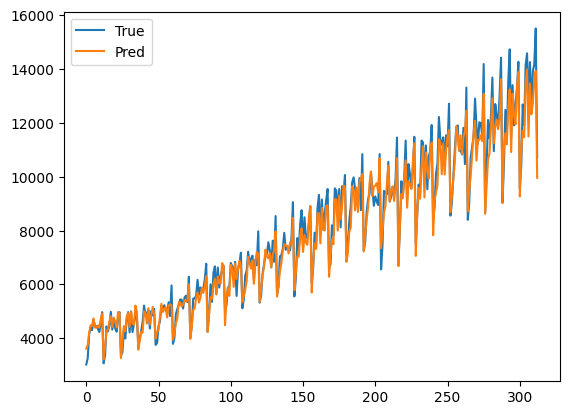

In [19]:
pred = Dmodel.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()


In [20]:
Lmodel.compile(optimizer='adam', loss='mse')
Lmodel.fit(X, y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0979
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0097
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078
Epoch 16/50
40/40

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


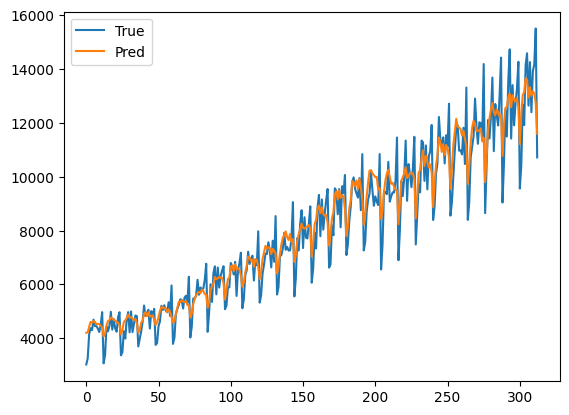

In [21]:
pred = Lmodel.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()


In [24]:
Dy_pred = Dmodel.predict(test_X)
Ly_pred = Lmodel.predict(test_X)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [25]:
Dmse = tf.reduce_mean(tf.square(test_y - Dy_pred))
Lmse = tf.reduce_mean(tf.square(test_y - Ly_pred))

print(f'DNN MSE: {Dmse.numpy()}')
print(f'LSTM MSE: {Lmse.numpy()}')

DNN MSE: 0.00259444822258927
LSTM MSE: 0.006260090045305553
